<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Centering-and-standardization-manually" data-toc-modified-id="Centering-and-standardization-manually-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Centering and standardization manually</a></span></li><li><span><a href="#Centering-and-standardization-with-IDG" data-toc-modified-id="Centering-and-standardization-with-IDG-0.1.2"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>Centering and standardization with IDG</a></span></li></ul></li></ul></li><li><span><a href="#DF-Loading-and-Conversion" data-toc-modified-id="DF-Loading-and-Conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DF Loading and Conversion</a></span></li></ul></div>

In [0]:
# Data Augmentation visualisation 

(just for fun)

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from io import BytesIO
from PIL import Image

In [0]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

Augmentation: mixed


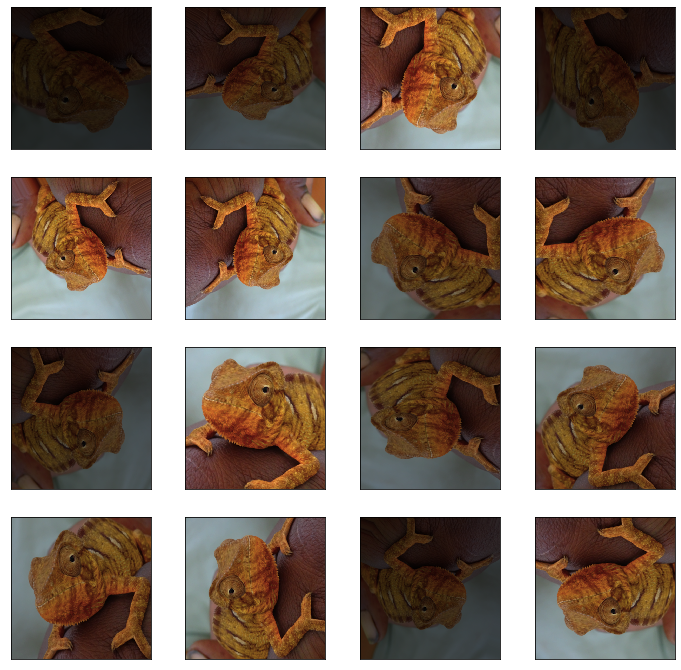

In [0]:
datagen7 = ImageDataGenerator(horizontal_flip=True,
                              vertical_flip=True,
                              rotation_range=90,
                              brightness_range=[0.2,1.0],
                              zoom_range=[0.6,1.0])

print("Augmentation: mixed")
display_images('trial.png', 4, datagen7, 12)

## Data Preprocessing

### Centering and standardization manually

Normalisation:
Min: 0.000, Max: 240.000
New Min: 0.000, New Max: 0.941
Per-channel centering and standardization:

Means: [0.5007352  0.40038113 0.33357826], Stds: [0.13924921 0.20574392 0.24281725]
Mins: [0. 0. 0.], Maxs: [0.9411765 0.827451  0.9019608]

New Means: [1.09598929e-13 2.16561076e-13 2.87549322e-14], New Stds: [1. 1. 1.]
New Mins: [-3.59596431 -1.94601682 -1.37378323], New Maxs: [3.16297136 2.07573505 2.34078316]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


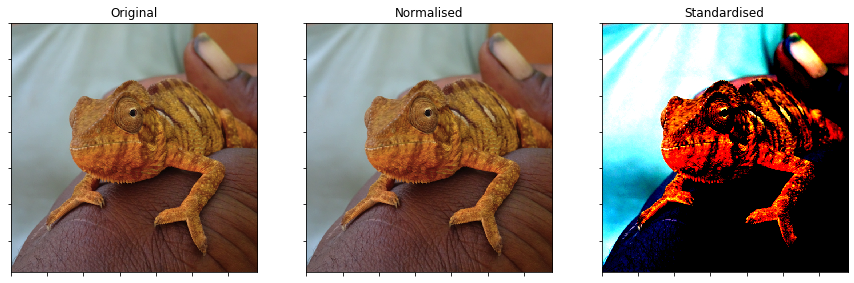

In [0]:
# source https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/

# example of per-channel centering (subtract mean) and standardization (divide by std)

# Load the image
img = load_img('trial.png')
data = img_to_array(img)

# normalise
print("Normalisation:")
print('Min: %.3f, Max: %.3f' % (data.min(), data.max()))
pixels = data / 255.0
print('New Min: %.3f, New Max: %.3f' % (pixels.min(), pixels.max()))

print("Per-channel centering and standardization:")
means = pixels.mean(axis=(0,1), dtype='float64')
stds = pixels.std(axis=(0,1), dtype='float64')
print('\nMeans: %s, Stds: %s' % (means, stds))
print('Mins: %s, Maxs: %s' % (pixels.min(axis=(0,1)), pixels.max(axis=(0,1))))
# per-channel standardization of pixels
pixels_new = (pixels - means) / stds
# confirm it had the desired effect
means_new = pixels_new.mean(axis=(0,1), dtype='float64')
stds_new = pixels_new.std(axis=(0,1), dtype='float64')
print('\nNew Means: %s, New Stds: %s' % (means_new, stds_new))
print('New Mins: %s, New Maxs: %s' % (pixels_new.min(axis=(0,1)), pixels_new.max(axis=(0,1))))

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15, 5))
ax1.imshow(img)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title("Original");
ax2.imshow(pixels, interpolation="nearest")
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_title("Normalised");
ax3.imshow(pixels_new, interpolation="nearest")
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_title("Standardised");

### Centering and standardization with IDG

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


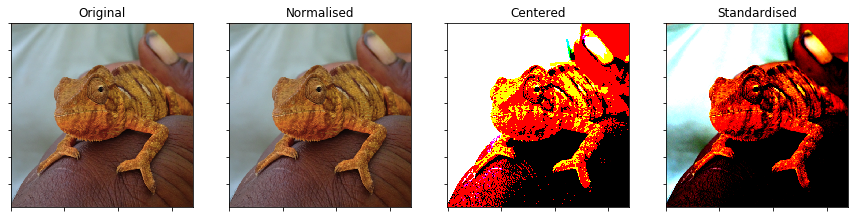

In [0]:
# source: https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/

datagen_norm = ImageDataGenerator(rescale=1.0/255.0)
datagen_center = ImageDataGenerator(samplewise_center=True)
datagen_standard = ImageDataGenerator(samplewise_center=True,
                                      samplewise_std_normalization=True)

def process_image(image_name, method):
    img = load_img(image_name)
    data = img_to_array(img)
    samples = expand_dims(data, 0)
    datagen = method
    it = datagen.flow(samples, batch_size=1)
    batch = it.next()
    image = batch[0]
    return image

img_norm = process_image('trial.png', datagen_norm)
img_center = process_image('trial.png', datagen_center)
img_standard = process_image('trial.png', datagen_standard)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (15, 5))
ax1.imshow(img)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title("Original");
ax2.imshow(img_norm)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_title("Normalised");
ax3.imshow(img_center)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_title("Centered");
ax4.imshow(img_standard)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.set_title("Standardised");

# DF Loading and Conversion

(what everyone actually wanted)

In [0]:
# load the libraries
import tensorflow as tf
import keras
import os

In [0]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


I have zipped and then moved the **croppedfaces** folder from **original_sequences** to **drive/My Drive**

In [0]:
# unzip the folder
!unzip "/content/drive/My Drive/croppedfaces.zip" -d "/content/drive/My Drive/"

(the output doesn't display folders for all videos because I have interrupted the loading with .py)

In [0]:
def get_number_of_images(local_path):
  '''Outputs the number of images (.jpg) in a provided folder'''

    data = []
    for filename in os.listdir(local_path):
          if filename.endswith("jpg"):
                data.append(filename)
                
    data = list(set(data))
    return (len(data))

In [0]:
def get_images(local_download_path, image_count):
      '''Outputs a list images in a speficied path
      Resizes images to all be the same size (for now 32x32)'''

    image_data_list = []
    for i in range(image_count):
        input_img = cv2.imread( local_download_path + '/'+ str(i) +'.jpg')
        input_img_resize=cv2.resize(input_img,(32,32)) # for future modification
        image_data_list.append(input_img_resize)
        
    return image_data_list

In [0]:
# set an empty image array
img_list=[]

# for k in range(1000): # if i were to read every folder in
# I have only loaded a few folders so was testing on 3 picked at random

for k in [168, 169, 551]:
  # initialise a path for a folder
    local_download_path = os.path.expanduser('/content/drive/My Drive/croppedfaces')
    local_download_path = local_download_path + '/' + str(k) + '_faces'

  # get image count for that folder
    image_count = get_number_of_images(local_download_path)

  # add to an array of images
    image_data_list = get_images(local_download_path, image_count)
    img_list += image_data_list

# convert to a tensor
print("Number of collected images:", len(img_list))
img_data = np.array(img_list)
print("Numpy array shape:", img_data.shape)
my_tensor = tf.convert_to_tensor(img_data)
print("Tensor shape:", my_tensor.shape)

Number of collected images: 175
Numpy array shape: (175, 128, 128, 3)
Tensor shape: (175, 128, 128, 3)


for labels and overall video classification:

1. create a dataframe with each row being of the formnat:
[image_id, true label, prediction, video_id]

2. groupby video_id and get an average (any other appropriate function) for a prediction for the video overall